In [1]:
#https://github.com/yalinyener/TwitterSentimentAnalysis/blob/master/SentimentAnalysis.ipynb

In [2]:
# Install Libraries
!pip install textblob
!pip install tweepy


In [3]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
# Authentication
consumerKey = "qI4nOPZl0BBWdy7hiDMOCsTwF"
consumerSecret = "GJJZ1NNGJ3NrujukxNmjqsCRGQ5ANBUKf0RzwtCl8IUzc2SLbZ"
accessToken = "1277486040526315520-6Gw2AhYoM4HfcN7SZD2bpGQxKyPWRz"
accessTokenSecret = "NPSzAUasBO4Fs0vFjmDKvaDDR955zuaClaPiq80XdJ8Y9"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [5]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = "S&P500"
noOfTweet = int('600')


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')
api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  600
positive number:  191
negative number:  12
neutral number:  397


In [7]:
tweet_list


,0
0,@meetstockboy S&amp;P500
1,RT @kpop_medley: Quick Mini Jimin’s Birthday G...
2,RT @GLCrypto1: BITCOIN - Valul 5?! [Analiza Te...
3,RT @kpop_medley: Quick Mini Jimin’s Birthday G...
4,"S&amp;P500 @ 4,365.11 up 0.09% , NASDAQ @ 14,7..."
...,...
595,RT @PrestonPysh: Update to fiat currency debas...
596,RT @Kamada3: ブログを更新しました。「米株はそろそろ売り時？？」 米国株式市場の...
597,RT @kpop_medley: Quick Mini Jimin’s Birthday G...
598,レバレッジ掛けてるナスダックでも普通のs&amp;p500でも積立金額が1000万以下くらい...


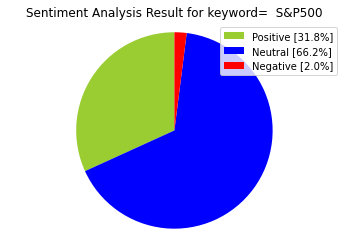

In [8]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [9]:
tweet_list.drop_duplicates(inplace = True)


In [10]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,@meetstockboy S&amp;P500,@meetstockboy S&amp;P500
1,RT @kpop_medley: Quick Mini Jimin’s Birthday G...,RT @kpop_medley: Quick Mini Jimin’s Birthday G...
2,RT @GLCrypto1: BITCOIN - Valul 5?! [Analiza Te...,RT @GLCrypto1: BITCOIN - Valul 5?! [Analiza Te...
4,"S&amp;P500 @ 4,365.11 up 0.09% , NASDAQ @ 14,7...","S&amp;P500 @ 4,365.11 up 0.09% , NASDAQ @ 14,7..."
5,RT @garyblack00: One potential driver of TSLA ...,RT @garyblack00: One potential driver of TSLA ...
...,...,...
585,色々と検証をしてみたくて、レバナス以外に\n普通のS＆P500とS＆P500レバも少し買って...,色々と検証をしてみたくて、レバナス以外に\n普通のS＆P500とS＆P500レバも少し買って...
593,@kyujilove22 おすすめ証券口座は楽天証券ですね！銀行でもNISAやidecoの口...,@kyujilove22 おすすめ証券口座は楽天証券ですね！銀行でもNISAやidecoの口...
594,RT @PrestonPysh: Update to fiat currency debas...,RT @PrestonPysh: Update to fiat currency debas...
595,RT @PrestonPysh: Update to fiat currency debas...,RT @PrestonPysh: Update to fiat currency debas...


In [11]:
tweet_list

,0,text
0,@meetstockboy S&amp;P500,@meetstockboy S&amp;P500
1,RT @kpop_medley: Quick Mini Jimin’s Birthday G...,RT @kpop_medley: Quick Mini Jimin’s Birthday G...
2,RT @GLCrypto1: BITCOIN - Valul 5?! [Analiza Te...,RT @GLCrypto1: BITCOIN - Valul 5?! [Analiza Te...
4,"S&amp;P500 @ 4,365.11 up 0.09% , NASDAQ @ 14,7...","S&amp;P500 @ 4,365.11 up 0.09% , NASDAQ @ 14,7..."
5,RT @garyblack00: One potential driver of TSLA ...,RT @garyblack00: One potential driver of TSLA ...
...,...,...
585,色々と検証をしてみたくて、レバナス以外に\n普通のS＆P500とS＆P500レバも少し買って...,色々と検証をしてみたくて、レバナス以外に\n普通のS＆P500とS＆P500レバも少し買って...
593,@kyujilove22 おすすめ証券口座は楽天証券ですね！銀行でもNISAやidecoの口...,@kyujilove22 おすすめ証券口座は楽天証券ですね！銀行でもNISAやidecoの口...
594,RT @PrestonPysh: Update to fiat currency debas...,RT @PrestonPysh: Update to fiat currency debas...
595,RT @PrestonPysh: Update to fiat currency debas...,RT @PrestonPysh: Update to fiat currency debas...


In [12]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,@meetstockboy S&amp;P500,s amp p500
1,RT @kpop_medley: Quick Mini Jimin’s Birthday G...,quick mini jimin s birthday ga p500 gcash r...
2,RT @GLCrypto1: BITCOIN - Valul 5?! [Analiza Te...,bitcoin valul 5 analiza tehnica btc dxy...
4,"S&amp;P500 @ 4,365.11 up 0.09% , NASDAQ @ 14,7...",s amp p500 4 365 11 up 0 09 nasdaq 14 7...
5,RT @garyblack00: One potential driver of TSLA ...,one potential driver of tsla as we approach y...
6,"BITCOIN - Valul 5?! [Analiza Tehnica BTC, DXY,...",bitcoin valul 5 analiza tehnica btc dxy ...
7,RT @IcedKnife: The SMB5000 &gt; S&amp;P500,the smb5000 gt s amp p500
10,$SP500 #SP500 - 1H: La tendencia de fondo es e...,sp500 sp500 1h la tendencia de fondo es e...
11,$SP500 #SP500 - 1H: La tendencia de fondo es e...,sp500 sp500 1h la tendencia de fondo es e...
12,RT @maeumihaul: ꒰ 🛒 ꒱ wts lfb interest check i...,wts lfb interest check ic ph dark and ...


In [13]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,@meetstockboy S&amp;P500,s amp p500,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
1,RT @kpop_medley: Quick Mini Jimin’s Birthday G...,quick mini jimin s birthday ga p500 gcash r...,0.333333,0.500000,positive,0.0,0.865,0.135,0.3612
2,RT @GLCrypto1: BITCOIN - Valul 5?! [Analiza Te...,bitcoin valul 5 analiza tehnica btc dxy...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
4,"S&amp;P500 @ 4,365.11 up 0.09% , NASDAQ @ 14,7...",s amp p500 4 365 11 up 0 09 nasdaq 14 7...,-0.155556,0.288889,neutral,0.0,1.000,0.000,0.0000
5,RT @garyblack00: One potential driver of TSLA ...,one potential driver of tsla as we approach y...,0.000000,1.000000,positive,0.0,0.876,0.124,0.4019
6,"BITCOIN - Valul 5?! [Analiza Tehnica BTC, DXY,...",bitcoin valul 5 analiza tehnica btc dxy ...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
7,RT @IcedKnife: The SMB5000 &gt; S&amp;P500,the smb5000 gt s amp p500,0.000000,0.000000,positive,0.0,0.656,0.344,0.2732
10,$SP500 #SP500 - 1H: La tendencia de fondo es e...,sp500 sp500 1h la tendencia de fondo es e...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
11,$SP500 #SP500 - 1H: La tendencia de fondo es e...,sp500 sp500 1h la tendencia de fondo es e...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000
12,RT @maeumihaul: ꒰ 🛒 ꒱ wts lfb interest check i...,wts lfb interest check ic ph dark and ...,-0.025000,0.400000,positive,0.0,0.875,0.125,0.4588


In [14]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [15]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [16]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
neutral,295,85.76
positive,32,9.30
negative,17,4.94


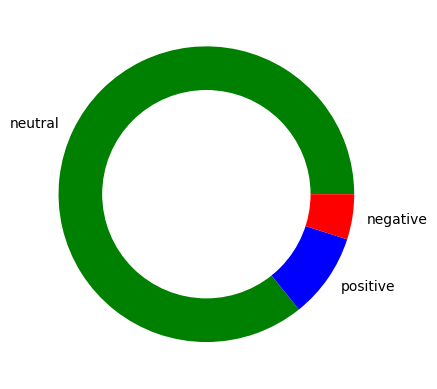

In [17]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [18]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [19]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [20]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)


,text_len
sentiment,
negative,93.88
neutral,97.45
positive,105.38


In [21]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)


,text_word_count
sentiment,
negative,17.71
neutral,11.44
positive,18.47


In [22]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [23]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [24]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [25]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [26]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [27]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,@meetstockboy S&amp;P500,s amp p500,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000,12,3,s amp p,"[, s, amp, p]","[, amp, p]","[, amp, p]"
1,RT @kpop_medley: Quick Mini Jimin’s Birthday G...,quick mini jimin s birthday ga p500 gcash r...,0.333333,0.500000,positive,0.0,0.865,0.135,0.3612,110,19,quick mini jimin s birthday ga p gcash rule...,"[, quick, mini, jimin, s, birthday, ga, p, gca...","[, quick, mini, jimin, birthday, ga, p, gcash,...","[, quick, mini, jimin, birthday, ga, p, gcash,..."
2,RT @GLCrypto1: BITCOIN - Valul 5?! [Analiza Te...,bitcoin valul 5 analiza tehnica btc dxy...,0.000000,0.000000,neutral,0.0,1.000,0.000,0.0000,88,13,bitcoin valul analiza tehnica btc dxy ...,"[, bitcoin, valul, analiza, tehnica, btc, dxy,...","[, bitcoin, valul, analiza, tehnica, btc, dxy,...","[, bitcoin, valul, analiza, tehnica, btc, dxi,..."
4,"S&amp;P500 @ 4,365.11 up 0.09% , NASDAQ @ 14,7...",s amp p500 4 365 11 up 0 09 nasdaq 14 7...,-0.155556,0.288889,neutral,0.0,1.000,0.000,0.0000,88,22,s amp p up nasdaq down dow j...,"[s, amp, p, up, nasdaq, down, dow, jones, up, ]","[amp, p, nasdaq, dow, jones, ]","[amp, p, nasdaq, dow, jone, ]"
5,RT @garyblack00: One potential driver of TSLA ...,one potential driver of tsla as we approach y...,0.000000,1.000000,positive,0.0,0.876,0.124,0.4019,124,23,one potential driver of tsla as we approach y...,"[, one, potential, driver, of, tsla, as, we, a...","[, one, potential, driver, tsla, approach, e, ...","[, one, potenti, driver, tsla, approach, e, in..."


In [28]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

344 Number of reviews has 737 words


In [29]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aapl,abnb,accumul,acho,act,ado,afraid,ago,ahorrar,...,xxii,yala,year,yere,yield,youtub,yoy,ytd,z,zim
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [30]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
p,328
amp,307
nasdaq,53
pt,44
dow,22
nisa,19
en,19
jone,18
de,16
emaxi,15


In [31]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [32]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('amp p500', 291),
 ('10 12', 34),
 ('2021 10', 31),
 ('dow jones', 18),
 ('nasdaq 14', 16),
 ('jones 34', 16),
 ('45 amp', 12),
 ('emaxis slim', 12),
 ('nasdaq100 14', 11),
 ('p500 4361', 10),
 ('4361 2pt', 9),
 ('2pt 69', 9),
 ('69 34496', 9),
 ('34496 72', 9),
 ('72 nasdaq', 9),
 ('nasdaq 14486', 9),
 ('14486 2pt', 9),
 ('2pt 64', 9),
 ('nisa amp', 8),
 ('slim amp', 7)]

In [33]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('2021 10 12', 25),
 ('dow jones 34', 16),
 ('45 amp p500', 12),
 ('amp p500 4361', 10),
 ('p500 4361 2pt', 9),
 ('4361 2pt 69', 9),
 ('2pt 69 34496', 9),
 ('69 34496 72', 9),
 ('34496 72 nasdaq', 9),
 ('72 nasdaq 14486', 9),
 ('nasdaq 14486 2pt', 9),
 ('14486 2pt 64', 9),
 ('nisa amp p500', 7),
 ('emaxis slim amp', 7),
 ('slim amp p500', 6),
 ('amp p500 amp', 5),
 ('sbi amp p500', 5),
 ('10 12 21', 5),
 ('amp p500 yala', 5),
 ('amp p500 351', 4)]

In [34]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl

In [35]:
SPY = yf.download("SPY", start="2021-10-11", end="2021-10-12", interval = "1h")
SPY

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2021-10-11 09:30:00-04:00,437.109985,440.260010,436.899994,440.149994,440.149994,10796926
2021-10-11 10:30:00-04:00,440.160004,440.230011,439.130005,439.380005,439.380005,5665053
2021-10-11 11:30:00-04:00,439.450012,440.140015,438.209991,438.630005,438.630005,6021153
2021-10-11 12:30:00-04:00,438.619995,438.649994,436.279999,436.470001,436.470001,7550419
2021-10-11 13:30:00-04:00,436.459991,437.320007,435.929993,436.559998,436.559998,7700143
2021-10-11 14:30:00-04:00,436.540009,437.070007,435.850006,435.885010,435.885010,6839798
2021-10-11 15:30:00-04:00,435.899994,436.190002,434.660004,434.660004,434.660004,11858933


<AxesSubplot:>

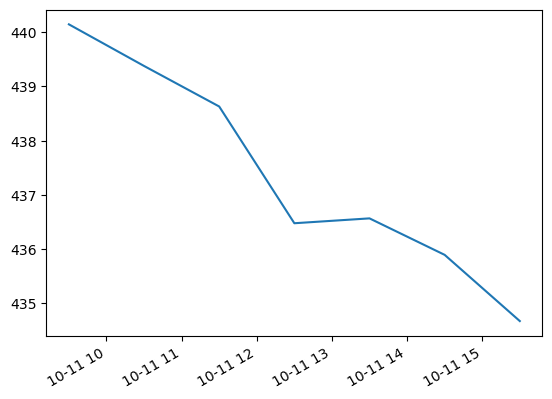

In [36]:
SPY['Adj Close'].plot()

In [37]:
tw_list.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 344 entries, 0 to 598
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0                344 non-null    object 
 1   text             344 non-null    object 
 2   polarity         344 non-null    float64
 3   subjectivity     344 non-null    float64
 4   sentiment        344 non-null    object 
 5   neg              344 non-null    float64
 6   neu              344 non-null    float64
 7   pos              344 non-null    float64
 8   compound         344 non-null    float64
 9   text_len         344 non-null    int64  
 10  text_word_count  344 non-null    int64  
 11  punct            344 non-null    object 
 12  tokenized        344 non-null    object 
 13  nonstop          344 non-null    object 
 14  stemmed          344 non-null    object 
dtypes: float64(6), int64(2), object(7)
memory usage: 51.1+ KB
